Clasiffication

**Paquetes**

In [1]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest  #Se usa con test statical y select # of the better features
from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import RandomForestClassifier

from pprint import pprint
import joblib

from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# modelos jerarquicos
import models

import numpy as np
np.random.seed(1234)

## 1) Load

In [2]:
# Binarias a clasificar feets + periodos
ruta1 = '../../data/outputs/outputPaso2clasificar.csv'
df1 = pd.read_csv(ruta1)
display(df1.head(2))
display(df1.shape)
f1_id_vvv = df1['id_vvv'].values #necesito esta lista con el id intacto

# Binarias id_vvv	ra(J2000)	dec(J2000)	ksEMeanMagPawprint
ruta2 = '../../data/outputs/outputPaso2ebs.csv'
df2 = pd.read_csv(ruta2)
display(df2.head(2))
f2_id_vvv = df1['id_vvv'].values
df2.shape

#ruta = '../3_clases/pasos/Test'
#df_test = pd.read_csv(ruta)
#X_test, y_test  = df_test.iloc[:, :-1], df_test.target
#display(X_test.shape, y_test.shape)

,id_vvv,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,...,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,Period_KFI,Period_PAN,Period_LSG,Period_PDM,Period_STR,dmin
0,5.158818e+11,0.375037,0.982969,1.0,0.266667,33.405273,10.0,0.5,0.0,1206468.2,...,0.667972,1.453847,1.733140,1.273550,0.057703,0.058487,0.158880,0.158877,0.158882,0.036198
1,5.158818e+11,0.173605,1.000000,1.0,0.217391,27.477640,10.0,0.5,0.0,0.0,...,0.682698,1.413160,1.649071,1.210574,0.345819,0.345819,0.345819,0.256950,0.345819,0.050266


(728, 70)

,id_vvv,ra(J2000),dec(J2000),ksEMeanMagPawprint
0,5.158818e+11,178.26020,-62.108135,16.703827
1,5.158818e+11,178.36063,-61.914257,13.738820


(728, 4)

In [3]:
display('Existen valores NaN', df1.info())
display('Existen valores NaN', df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_vvv                           728 non-null    float64
 1   Amplitude                        728 non-null    float64
 2   AndersonDarling                  728 non-null    float64
 3   Autocor_length                   728 non-null    float64
 4   Beyond1Std                       728 non-null    float64
 5   CAR_mean                         728 non-null    float64
 6   CAR_sigma                        728 non-null    float64
 7   CAR_tau                          728 non-null    float64
 8   Con                              728 non-null    float64
 9   Eta_e                            728 non-null    float64
 10  FluxPercentileRatioMid20         728 non-null    float64
 11  FluxPercentileRatioMid35         728 non-null    float64
 12  FluxPercentileRatioMid

'Existen valores NaN'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_vvv              728 non-null    float64
 1   ra(J2000)           728 non-null    float64
 2   dec(J2000)          728 non-null    float64
 3   ksEMeanMagPawprint  728 non-null    float64
dtypes: float64(4)
memory usage: 22.9 KB


'Existen valores NaN'

None

In [4]:
display(df1.id_vvv[0])
df2.id_vvv[0]

515881822600.0

515881822600.0

df1 = pd.DataFrame(df1.astype(np.float32).values, columns=df1.columns)
df2 = pd.DataFrame(df2.astype(np.float32).values, columns=df2.columns)

In [5]:
display(df1.id_vvv[0])
df2.id_vvv[0]

515881822600.0

515881822600.0

In [6]:
display('Existen valores NaN', df1.isnull().values.any())
display('Existen valores NaN', df2.isnull().values.any())

display('Existen valores finite', df1.isin([np.inf, -np.inf]).values.any())
display('Existen valores finite', df2.isin([np.inf, -np.inf]).values.any())


'Existen valores NaN'

False

'Existen valores NaN'

False

'Existen valores finite'

False

'Existen valores finite'

False

In [7]:
display('Existen valores NaN', df1.info())
display('Existen valores NaN', df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_vvv                           728 non-null    float64
 1   Amplitude                        728 non-null    float64
 2   AndersonDarling                  728 non-null    float64
 3   Autocor_length                   728 non-null    float64
 4   Beyond1Std                       728 non-null    float64
 5   CAR_mean                         728 non-null    float64
 6   CAR_sigma                        728 non-null    float64
 7   CAR_tau                          728 non-null    float64
 8   Con                              728 non-null    float64
 9   Eta_e                            728 non-null    float64
 10  FluxPercentileRatioMid20         728 non-null    float64
 11  FluxPercentileRatioMid35         728 non-null    float64
 12  FluxPercentileRatioMid

'Existen valores NaN'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_vvv              728 non-null    float64
 1   ra(J2000)           728 non-null    float64
 2   dec(J2000)          728 non-null    float64
 3   ksEMeanMagPawprint  728 non-null    float64
dtypes: float64(4)
memory usage: 22.9 KB


'Existen valores NaN'

None

In [8]:
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.fillna(0)

df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.fillna(0)

In [9]:
display('Existen valores finite', df1.isin([np.inf, -np.inf]).values.any())
display('Existen valores finite', df2.isin([np.inf, -np.inf]).values.any())

'Existen valores finite'

False

'Existen valores finite'

False

In [10]:
df1['id_vvv'] = f1_id_vvv

## Preprocesado

In [11]:
drop_columns = ['Freq3_harmonics_rel_phase_0', 'CAR_tau',
                'Freq1_harmonics_rel_phase_0',
                'CAR_sigma', 'Freq2_harmonics_rel_phase_0', 
                'Period_STR', 'Period_LSG', 'Period_KFI', 'Period_PAN', 'Period_PDM']

In [12]:
X_1 = df1.drop(drop_columns, axis=1).copy()
X = X_1.drop('id_vvv', axis=1).copy()
X = X.values

## 3) Model

In [27]:
minmax

MinMaxScaler()

In [13]:
# Minimización
#minmax = joblib.load("../preprocesado/min_max_scaler76.joblib")
minmax = joblib.load("../preprocesado/min_max_scaler134.joblib")
X_scale =  minmax.transform(X).copy()

# Selección de Características
#IM = joblib.load('../preprocesado/fs_IM76.joblib')
IM = joblib.load('../preprocesado/fs_IM134.joblib')
X_IM =  IM.transform(X_scale).copy()

**Clasificación**

In [14]:
y_pred = []

'''Clasificación M1'''
X1 = models.M1(X_IM)

'''Clasificación M2 y M3, esto lo hace por elemento'''
for i in range(X1.shape[0]):
    if X1[i] == 0:
        M2, x2 = models.M2(X_IM[i].reshape(1, -1))
        #print(i, M2, 'count', x2[0])
        y_pred.append(x2[0])
    else:
        M3, x3 = models.M3(X_IM[i].reshape(1, -1))
        y_pred.append(x3[0])

**Guardo las clasificaciones**

In [15]:
len(y_pred)

728

In [16]:
df2a = df2.copy()
df2a.head(2)

,id_vvv,ra(J2000),dec(J2000),ksEMeanMagPawprint
0,5.158818e+11,178.26020,-62.108135,16.703827
1,5.158818e+11,178.36063,-61.914257,13.738820


In [17]:
df2a['PeriodLS'] = df1.PeriodLS
df2a['jeras_class'] = y_pred

In [18]:
df2a.head(2)

,id_vvv,ra(J2000),dec(J2000),ksEMeanMagPawprint,PeriodLS,jeras_class
0,5.158818e+11,178.26020,-62.108135,16.703827,0.970470,0
1,5.158818e+11,178.36063,-61.914257,13.738820,0.256959,2


<AxesSubplot:>

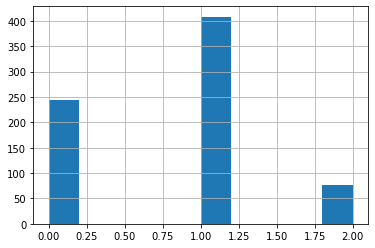

In [19]:
df2a['jeras_class'].hist()

**Transforma la variable class de cuantitativa a cualitativa**

-  0  -> detached
-  1 -> contact
-  2 -> semi 

In [20]:
def f(x):
    if x == 0:
        x='D'
    elif x == 1:
        x='C'
    else:
        x='SD'
    return x
    
    
df2a['jeras_class'] = df2a['jeras_class'].apply(f)

In [21]:
df2a.head(2)

,id_vvv,ra(J2000),dec(J2000),ksEMeanMagPawprint,PeriodLS,jeras_class
0,5.158818e+11,178.26020,-62.108135,16.703827,0.970470,D
1,5.158818e+11,178.36063,-61.914257,13.738820,0.256959,SD


In [22]:
df2a.shape

(728, 6)

In [23]:
df2a['jeras_class'].value_counts()

C     408
D     244
SD     76
Name: jeras_class, dtype: int64

In [24]:
df2a.astype(str).to_csv('outputs/outputPaso3_jerar134.csv', header=True, index=False)